<a href="https://colab.research.google.com/github/gabridulol/nn-and-dl/blob/main/pa1_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gabriel Rodrigues Marques (5097)

#**PA1: Logistic Regression**

### **Introduction**

In this programming assignment, you will implement logistic regression in Python using only the numpy library. This model will be used to solve the cat image classification problem seen during the classes.

### **Objective**

The objective is to learn the general structure of an artificial neural network project, which includes:

1. Load and preprocess the dataset;
2. Define the model;
3. Initialize the weights;
4. Choose the cost function;
5. Calculate the gradient vector of the cost function with respect to the weights;
6. Optimize weights with gradient descent on the training set;
7. Evaluate the model on the test set;
8. Apply the model to unseen data.

### **Instructions**

The cells where you have to write code are highlighted with the following comments:

```python
### YOUR CODE STARTS HERE ### ≈x lines
### YOUR CODE ENDS HERE ###
```

Write your solutions only between these two comments. Note that the start comment gives you an idea of the number of lines of code expected in the solution.

After each cell of this type, there will be a test cell followed by expected results, so you know if your solution is correct.

### **Part 0: Import libraries**

Before starting the actual work, you need to include the numpy library and other auxiliary libraries, which will help us visualize the data and results:

- **numpy**: main scientific computing library in Python.
- **matplotlib**: main library for plotting graphs in Python.
- **h5py**: read dataset in h5 format.
- **PIL**: test your model with your own images.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image

%matplotlib inline

### **Part 1: Load and preprocess the dataset**

#### **1.1 Download the dataset**

The dataset for this project contains:

- Training: $n_{tr}$ images labeled as Cat ($y=1$) or Not-cat (y=0)
- Test: $n_{te}$ images labeled as Cat ($y=1$) or Not-cat ($y=0$)

All images are square and colored. Thus, they are represented by numpy arrays of the form `(num_px, num_px, 3)`, where `num_px` is the width and height of the image and 3 refers to the color channels (RGB).


In [ ]:
!wget -O 'data/train_catvnoncat.h5' 'https://raw.githubusercontent.com/gabridulol/nn-and-dl/main/data/train_catvnoncat.h5'
!wget -O 'data/test_catvnoncat.h5' 'https://raw.githubusercontent.com/gabridulol/nn-and-dl/main/data/test_catvnoncat.h5'

train_dataset = h5py.File('train_catvnoncat.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # training set images
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # training set image labels

test_dataset = h5py.File('test_catvnoncat.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # testing set images
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # testing set image labels

classes = np.array(test_dataset["list_classes"][:]) # list of classes

train_set_y = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

--2025-09-16 18:11:26--  https://raw.githubusercontent.com/JhonataMiranda/CCF482/main/train_catvnoncat.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2572022 (2.5M) [application/octet-stream]
Saving to: ‘train_catvnoncat.h5’

train_catvnoncat.h5 100%[===================>]   2.45M  7.22MB/s    in 0.3s    

2025-09-16 18:11:27 (7.22 MB/s) - ‘train_catvnoncat.h5’ saved [2572022/2572022]

--2025-09-16 18:11:27--  https://raw.githubusercontent.com/JhonataMiranda/CCF482/main/test_catvnoncat.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK

#### **1.2 Visualization of dataset examples**

Each row of `train_set_x_orig` and `test_set_x_orig` is a numpy array representing an image. You can visualize an example by running the following code. Feel free to change the value of the `index` variable and run again to see other images.

y = 1, it's a 'cat' picture.


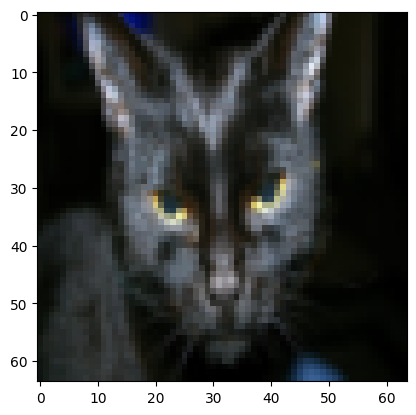

In [ ]:
# Plotting an image from the training set
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[0, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

#### **1.3 Problem dimensionality**

This is the first cell where you will write code. Create the following variables:

- `n_train` (number of training examples)
- `n_test` (number of test examples)
- `num_px` (height and width of an image from the dataset)

Use the `shape` property of numpy arrays and remember that `train_set_x_orig` is a numpy array of shape `(m_train, num_px, num_px, 3)`.

In [ ]:
### YOUR CODE STARTS HERE ### (≈3 lines)
n_train = train_set_x_orig.shape[0]
n_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
### YOUR CODE ENDS HERE ###

print ("Number of training examples: n_train = " + str(n_train))
print ("Number of testing examples: n_test = " + str(n_test))
print ("Height/Width of the images: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: n_train = 209
Number of testing examples: n_test = 50
Height/Width of the images: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


**Expected Results**:
<table style="width:15%">
  <tr>
    <td>n_train</td>
    <td>209</td>
  </tr>
  
  <tr>
    <td>n_test</td>
    <td> 50 </td>
  </tr>
  
  <tr>
    <td>num_px</td>
    <td> 64 </td>
  </tr>
  
</table>

#### **1.4 Preprocessing the data**

#### **1.4.1 Transforming images into feature vectors**

To process the images from the dataset with logistic regression, we need to transform them into feature vectors. To do this, we will flatten these images, originally with shape `(num_px, num_px, 3)`, into vectors of shape `(num_px * num_px * 3, 1)`. Use the reshape function of numpy arrays to modify the shape of the training `(train_set_x_orig)` and test `(test_set_x_orig)` images. Store the flattened training and test images in new arrays called `train_set_x_flatten` and `test_set_x_flatten`, respectively.

In [ ]:
### YOUR CODE STARTS HERE ### (≈2 lines)
train_set_x_flatten = train_set_x_orig.reshape(n_train, -1).T
test_set_x_flatten = test_set_x_orig.reshape(n_test, -1).T
### YOUR CODE ENDS HERE ###

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("First 5 features (pixel values) of the first training example: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
First 5 features (pixel values) of the first training example: [17 31 56 22 33]


**Expected Results**:

<table style="width:35%">
  <tr>
    <td>train_set_x_flatten shape</td>
    <td> (12288, 209)</td>
  </tr>
  <tr>
    <td>train_set_y shape</td>
    <td>(1, 209)</td>
  </tr>
  <tr>
    <td>test_set_x_flatten shape</td>
    <td>(12288, 50)</td>
  </tr>
  <tr>
    <td>test_set_y shape</td>
    <td>(1, 50)</td>
  </tr>
  <tr>
  <td>First 5 features (pixel values) of the first training example</td>
  <td>[17 31 56 22 33]</td>
  </tr>
</table>

#### **1.4.2 Normalize pixel values**

A very common image preprocessing step in machine learning is to normalize pixel values between 0 and 1. To do this, simply divide each row of the dataset by 255 (the maximum value of a pixel channel). Divide the `train_set_x_flatten` and `test_set_x_flatten` arrays of flattened images by 255 and store the results in new arrays called `train_set_x` and `test_set_x`.

In [ ]:
### YOUR CODE STARTS HERE ### (≈2 lines)
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.
### YOUR CODE ENDS HERE ###

print ("First 5 features of the normalized feature vector of the first training example: " + str(train_set_x[0:5,0]))

First 5 features of the normalized feature vector of the first training example: [0.06666667 0.12156863 0.21960784 0.08627451 0.12941176]


**Expected Results**:

<table style="width:35%">
  <tr>
    <td>First 5 features of the normalized feature vector of the first training example</td>
    <td> [0.06666667 0.12156863 0.21960784 0.08627451 0.12941176]</td>
  </tr>
</table>

### **Part 2: Defining the model**

The model we will use for classifying cat images is logistic regression. Remember that this model has the following hypothesis:

$\hat{y} = h(x) = \sigma(w \cdot x + b)$, where:

- $x \in R^d$ is a feature vector;
- $w \in R^d$ is the weight vector (which we will learn);
- $b \in R$ is a bias independent of $x$ (which we will also learn);
- $w \cdot x$ is the dot product of $w$ and $x$;
- $\sigma$ is the logistic or sigmoid function $\frac{1}{1 + e^{-z}}$.

Also remember that the loss function for this model is Binary Cross-Entropy, defined as:

$L(h) = -\frac{1}{m}\sum_{i=1}^{m}(y_i * log\ \hat{y^{(i)}} + (1 - y^{(i)})*log(1 - \hat{y^{(i)}}))$, where:

- $m$ is the number of examples in the training set;
- $y_i$ is the true label of example $x_i$;
- $\hat{y^{(i)}}$ is the estimated probability by the logistic function that example $x^{(i)}$ is of the Cat class ($y = 1$).

#### **2.1 Sigmoid Function**

To make your code more readable, implement the sigmoid function independently of logistic regression.

In [ ]:
def sigmoid(z):
    """
    Computes the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### YOUR CODE STARTS HERE ### (≈1 line)
    s = 1 / (1 + np.exp(-z))
    ### YOUR CODE ENDS HERE ###

    return s

In [ ]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


**Expected Results**:

<table>
  <tr>
    <td>sigmoid([0, 2])</td>
    <td>[0.5, 0.88079708]</td>
  </tr>
</table>

#### **2.2 Logistic Regression**

Using the `sigmoid` function implemented in the previous step and the `np.dot` function from numpy, implement the logistic regression hypothesis. Note that the input $X$ is a matrix, where each column is a feature vector $x$ from the training set. As numpy performs vector operations, you don't need to use a loop to process each row individually, you can execute `logistic_regression(X)`, passing the matrix $X$ as an argument, and numpy will return a vector of predictions $\hat{Y}$, with one prediction for each row of $X$.

In [ ]:
def logistic_regression(X, w, b):
    """
    Computes the logistic regression hypothesis h(x) = sigmoid(wx + b)

    Arguments:
    w -- weights of size (1, num_px * num_px * 3)
    b -- bias (scalar)
    X -- data of size (num_px * num_px * 3, number of examples)

    Return:
    Y_hat -- prediction for each example in X of size (1, number of examples)
    """

    ### YOUR CODE STARTS HERE ### (≈1 line)
    Y_hat = sigmoid(np.dot(w, X) + b)
    ### YOUR CODE ENDS HERE ###

    return Y_hat

In [ ]:
w, b, X = np.array([[1.,2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]])
Y_hat = logistic_regression(X, w, b)
print("Y_hat = " + str(Y_hat))

Y_hat = [[0.99987661 0.99999386 0.00449627]]


**Expected Results**:

<table>
  <tr>
    <td>Y_hat</td>
    <td>[[0.99987661 0.99999386 0.00449627]]</td>
  </tr>
</table>

### **Part 3: Initialize weights**

As in logistic regression we have a convex optimization problem, we can initialize the weights with zeros or randomly. When we implement artificial neural networks with multiple layers, we will have to be a little more careful in initializing the weights. Therefore, as a way to prepare for this future step, here you will also have to implement a weight initialization function. In this function, you will use the `np.zeros` function to initialize the weights of logistic regression with zeros.

In [ ]:
def initialize_weights(d):
    """
    Creates a vector of zeros of shape (1, d) for w and initializes b to 0.

    Argument:
    d -- the size of each example in the dataset (num_px * num_px * 3)

    Returns:
    w -- initialized vector of shape (1, d)
    b -- initialized scalar (corresponds to the bias)
    """

    ### YOUR CODE STARTS HERE ### (≈2 lines)
    w = np.zeros((1, d))
    b = 0
    ### YOUR CODE ENDS HERE ###

    assert(w.shape == (1, d))
    assert(isinstance(b, float) or isinstance(b, int))

    return w, b

In [ ]:
w, b = initialize_weights(d=2)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0. 0.]]
b = 0


**Expected Results**:

<table>
    <tr>
        <td>  w  </td>
        <td> [[ 0. 0.]] </td>
    </tr>
    <tr>
        <td> b </td>
        <td> 0 </td>
    </tr>
</table>

### **Part 4: Defining a loss function**

Usually, the loss function chosen for binary classification problems with logistic regression is Binary Cross-Entropy, as it defines a convex optimization problem. Use the `np.log` function to implement Binary Cross-Entropy for a given prediction vector `Y_hat`.

In [ ]:
def binary_cross_entropy(Y, Y_hat):
    """
    Computes the binary cross entropy loss.

    Argument:
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)
    Y_hat -- predictions vector (containing the probability of being cat) of size (1, number of examples)

    Returns:
    loss -- the total loss (scalar) of the predictions Y_hat
    """
    n = X.shape[1]

    ### YOUR CODE STARTS HERE ### (≈1 line)
    loss = - (1/n) * np.sum(Y * np.log(Y_hat) + (1 - Y) * np.log(1 - Y_hat))
    ### YOUR CODE ENDS HERE ###

    return loss

In [ ]:
w, b, X, Y = np.array([[1.,2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
Y_hat = logistic_regression(X, w, b)
loss = binary_cross_entropy(Y, Y_hat)
print("loss = " + str(loss))

loss = 5.801545319394553


**Expected Results**:

<table>
    <tr>
        <td>  loss  </td>
        <td> 5.801545319394553 </td>
    </tr>
</table>

### **Part 5: Calculating the gradient vector**

Compute the partial derivatives `dw` and `db` of the binary cross-entropy $L$ with respect to the weights `w` and `b` as we derived in class:

$$ \frac{\partial L}{\partial w} = \frac{1}{m} (\hat{Y}-Y) \cdot X^T$$
$$ \frac{\partial L}{\partial b} = \frac{1}{m} \sum_{i=1}^m (\hat{y}^{(i)}-y^{(i)})$$

In [ ]:
def gradient(X, Y, Y_Hat):
    """
    Computes the gradient of the binary cross entropy loss with respect to the logistic regression weights.

    Arguments:
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)
    Y_hat -- predictions vector (containing the probability of being cat) of size (1, number of examples)

    Returns:
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    """
    n = X.shape[1]

    ### YOUR CODE STARTS HERE ### (≈2 lines)
    dw = (1/n) * np.dot(X, (Y_Hat - Y).T).T
    db = (1/n) * np.sum(Y_Hat - Y)
    ### YOUR CODE ENDS HERE ###

    grads = {"dw": dw, "db": db}

    return grads

In [ ]:
w, b, X, Y = np.array([[1.,2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
Y_hat = logistic_regression(X, w, b)
grads = gradient(X, Y, Y_hat)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

dw = [[0.99845601 2.39507239]]
db = 0.001455578136784208


**Expected Results**:

<table>
    <tr>
      <td>dw</td>
      <td> [[ 0.99845601 2.39507239 ]]</td>
    </tr>
    <tr>
        <td>db</td>
        <td> 0.00145557813678 </td>
    </tr>

</table>

### **Part 6: Optimizing weights with gradient descent**

Use the functions implemented above `initialize_weights`, `logistic_regression`, `binary_cross_entropy`, and `gradient` to implement the gradient descent algorithm and optimize the weights $w$ and $b$ of logistic regression.

In [ ]:
def optimize(X_train, Y_train, epochs, learning_rate, print_loss = False):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    w -- weights, a numpy array of size (1, num_px * num_px * 3)
    b -- bias, a scalar

    epochs -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_loss -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    losses -- list of all the losses computed during the optimization, this will be used to plot the learning curve.
    """
    # Initialize weights
    ### YOUR CODE STARTS HERE ### (≈1 lines)

    w, b = initialize_weights(X_train.shape[0])

    ### YOUR CODE ENDS HERE ###

    losses = []
    for i in range(epochs):
        # Compute Y_hat predictions with logistic regression
        ### YOUR CODE STARTS HERE ### (≈1 line)
        Y_hat = logistic_regression(X_train, w, b)
        ### YOUR CODE ENDS HERE ###

        # Compute the loss for predictions Y_hat
        ### YOUR CODE STARTS HERE ### (≈1 line)
        loss = binary_cross_entropy(Y_train, Y_hat)
        ### YOUR CODE ENDS HERE ###

        # Compute the gradient of your loss function with respect to w and b
        ### YOUR CODE STARTS HERE ### (≈1 line)
        grads = gradient(X_train, Y_train, Y_hat)
        ### YOUR CODE ENDS HERE ###

        # Store partial derivatives from the gradient vector
        dw = grads["dw"]
        db = grads["db"]

        # Update the weights w and b using the gradient descent update rule
        ### YOUR CODE STARTS HERE ### (≈2 lines)
        w = w - learning_rate * dw
        b = b - learning_rate * db
        ### YOUR CODE ENDS HERE ###

        # Store the loss values
        if i % 100 == 0:
            losses.append(loss)

        # Print the loss value after each Imprime a perda a cada 100 iterações de treinamento
        if print_loss and i % 100 == 0:
            print ("Loss after iteration %i: %f" %(i, loss))

    params = {"w": w, "b": b}

    return params, losses

In [ ]:
epochs = 2000
learning_rate = 0.005
params, losses = optimize(train_set_x, train_set_y, epochs, learning_rate, print_loss = False)
w = params["w"]
b = params["b"]
print ("w = " + str(w))
print ("b = " + str(b))

w = [[ 0.00961402 -0.0264683  -0.01226513 ... -0.01144453 -0.02944783
   0.02378106]]
b = -0.015906243999692968


**Expected Results**:

<table>
    <tr>
      <td>w</td>
      <td> [[ 0.00961402 -0.0264683  -0.01226513 ... -0.01144453 -0.02944783 0.02378106]]</td>
    </tr>
    <tr>
        <td>b</td>
        <td> -0.015906243999693 </td>
    </tr>

</table>

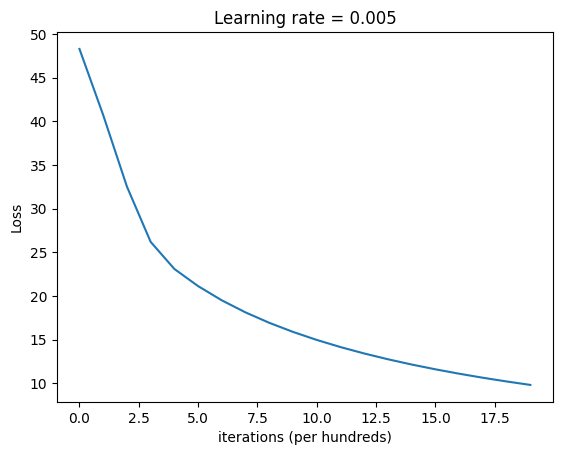

In [ ]:
# Plot learning curve
plt.plot(losses)
plt.ylabel('Loss')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate = " + str(learning_rate))
plt.show()

### **Part 7: Evaluating the model on the test set**

Finally, apply the threshold $\hat{y} =
\begin{cases}
1,\ \text{if}\ h(x) \geq 0.5\
0,\  \text{if}\ h(x) < 0.5\
\end{cases}$ to classify all examples of a matrix $X$ of examples.

In [ ]:
def predict(X, w, b):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array of size (1, num_px * num_px * 3)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0 or 1) for the examples in X
    '''
    ### YOUR CODE STARTS HERE ### (≈2 lines)
    Y_hat = logistic_regression(X, w, b)
    Y_prediction = (Y_hat > 0.5).astype(int)
    ### YOUR CODE ENDS HERE ###

    return Y_prediction

In [ ]:
Y_prediction_train = predict(train_set_x, w, b)
Y_prediction_test = predict(test_set_x, w, b)

print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - train_set_y)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - test_set_y)) * 100))

train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


**Expected Results**:
<table>
    <tr>
        <td>train Accuracy  </td>
        <td> 99.04306220095694 % </td>
    </tr>
    <tr>
        <td> test Accuracy </td>
        <td> 70.0 % </td>
    </tr>
</table>

If you achieved the accuracy results above, congratulations! You have successfully completed this project! Now move on to the next step to use the classifier you trained on your own images.

### **Part 8: Applying the model to unseen data**

To test your model with your own images, you will have to upload the images you want to test to your UFV Google Drive. Then configure the `image_path` variable in the cell below to point to the path of the image in your Google Drive. Note that the path to the root directory of your Google Drive is "/content/gdrive/MyDrive/". Therefore, if your image is in the root of your Google drive and is called "my_cat.jpg", the variable should be set as `image_path = /content/gdrive/MyDrive/my_cat.jpg`

Mounted at /content/gdrive
y = 1, your algorithm predicts a "cat" picture.


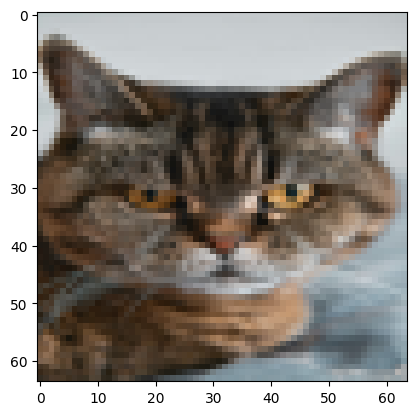

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

### YOUR CODE STARTS HERE ### (≈1 line)
image_path = "/content/gdrive/MyDrive/my_cat.jpg"
### YOUR CODE ENDS HERE ###

# Preprocess the image to fit your algorithm.
with Image.open(image_path) as im:
  low_res_image = np.array(im.resize((num_px, num_px)))

x = low_res_image.reshape((num_px * num_px * 3, 1))
y = predict(x, w, b)

plt.imshow(low_res_image)
print("y = " + str(np.squeeze(y)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(y)),].decode("utf-8") +  "\" picture.")